# Regression Mertrics:
    1.Mean Absolute Error:
    2.Mean Square Error:
    3. Root mean square error:
    4.R2_score:(Coefficient of determination)
    5.Adjusted R2_score


# 1.MAE(mean absolute error):
    -> sare point ke respect me model jo galti kr raha hai usko find karo.
![alt text](<Screenshot 2024-05-04 213514.png>)

### Advantage of MAE:
    1.The unit of output columns and MAE is same.
    2.Robust outlier
### Disadvantage:
    1. Modulus function graph do not differentiable at origin.
    

# Mean square error:(MSE)
![alt text](<Screenshot 2024-05-04 224827.png>)

# Advantage:
    1.differentiable at origin.
# Disadvantage:
    2. Not roubst to outlier.

# RMSE:
    -> root over of MSE.
    -> output of RMSE have same output as the data.
    -> else is same as MSE.
# Disadvantage:
    -> not robust to outlier.

# R2_score:
    -> Model kina better perform kr rha hai as compare to mean wala model.
![alt text](<Screenshot 2024-05-04 225911.png>)

    Here;
    ->SSR-Sum of square error for regression line
    -> SSM-sum of square mean

    
    Notes:
    1.if R=0 then mean line and regression line is equal.(kharab model)
    2.if R=1 then the regression line is perfect.
    3.if R<0 then the regression line making more error then mean model.

    
    e.g:
    -> if r=0.80 explain the 80% of  variance in lpa.


# Disadvantage:
    -> if irrelevent data exist in datasets the R2_score doesn't work properly.

# Adjusted R2 score:
![alt text](<Screenshot 2024-05-04 231600.png>)    

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:\Machine_learning\csv_files\placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Pacakge in lpa')

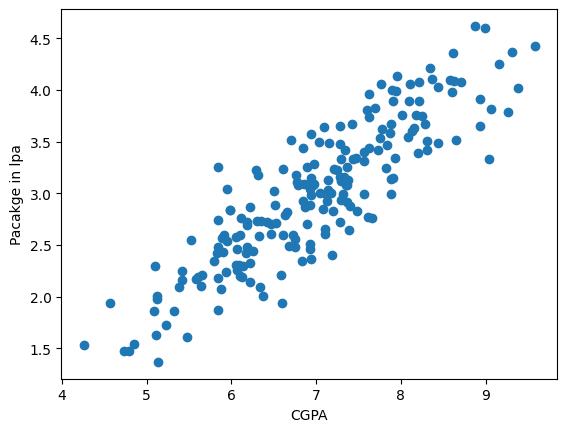

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Pacakge in lpa')

In [5]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package in lpa')

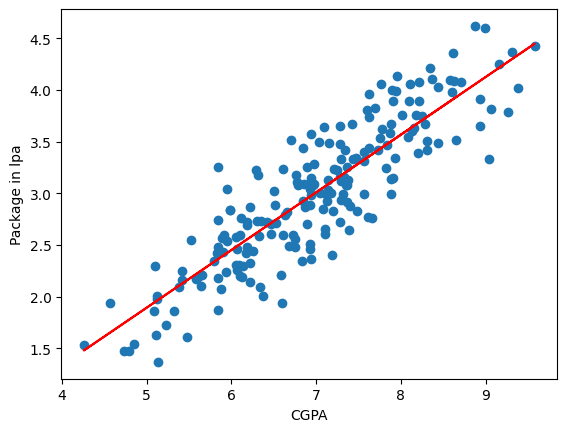

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')

plt.xlabel('CGPA')
plt.ylabel('Package in lpa')

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
y_pred=lr.predict(x_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  0.2884710931878175


In [17]:
print('mean square error: ',mean_squared_error(y_test,y_pred))

mean square error:  0.12129235313495527


In [18]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [19]:
r2=r2_score(y_test,y_pred)
print("MSE:",r2)

MSE: 0.780730147510384


In [20]:
# Adjusted r2_score:
x_test.shape

(40, 1)

In [21]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [22]:
import numpy as np
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)

new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.771118,3.26
1,5.12,0.234543,1.98
2,7.82,0.800912,3.25
3,7.42,0.060590,3.67
4,6.94,0.617476,3.57


Text(0, 0.5, 'package in lpa')

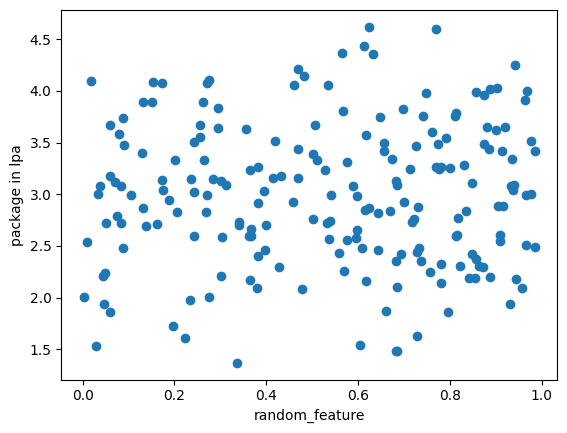

In [23]:
plt.scatter(new_df1['random_feature'],df['package'])

plt.xlabel('random_feature')
plt.ylabel('package in lpa')

In [24]:
x=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]

In [25]:
x_train,x_test,y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(x_test)

In [29]:
print('R2 score',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 score 0.7822863219091494


In [30]:
1-((1-r2)*(40-1)/(40-1-2))

0.7705180149853196